<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab *6*: *SVM***

### **Tenggat Waktu: 26 November 2021, 23.55 WIB**
</center>

#### **Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: F_Lab1_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **26 November 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pertanyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Muhammad Irfan Junaidi"
KELAS = "A"
NPM = "1906293202"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = [
    "1906353776"
]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    "https://scikit-learn.org/stable/modules/svm.html"
]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Irfan Junaidi dari kelas A dengan NPM 1906293202, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Irfan Junaidi)


# SVM

Support Vector Machine (SVM) adalah salah satu metode supervised learning yang biasanya digunakan untuk klasifikasi (seperti Support Vector Classification) dan regresi (Support Vector Regression). Dalam pemodelan klasifikasi, SVM memiliki konsep yang lebih matang dan lebih jelas secara matematis dibandingkan dengan teknik-teknik klasifikasi lainnya. SVM juga dapat mengatasi masalah klasifikasi dan regresi dengan linear maupun non linear.

SVM digunakan untuk mencari hyperplane terbaik dengan memaksimalkan jarak antar kelas. Hyperplane adalah sebuah fungsi yang dapat digunakan untuk pemisah antar kelas. 

Dalam tutorial kali ini, kita menggunakan SVC, yaitu model klasifikasi yang menggunakan SVM



## Contoh penggunaan SVM

**Perlu diperhatikan kalau Library SVM hanya menerima dataset yang telah diubah ke numpy.ndarray, sehingga jika datasetnya masih dalam bentuk pandas, maka ubah ke numpy.ndarray**

Diambil dari : https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [3]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [4]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)


Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [5]:
# print data(feature)shape
cancer.data.shape

(569, 30)

In [6]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [7]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [8]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [9]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [11]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


## Perbedaan tiap kernel SVC

Dalam library SVC, terdapat parameter `kernel` dimana menentukan rumus yang digunakan oleh library SVC 

Lebih lanjut tentang SVC dapat dilihat di docs sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

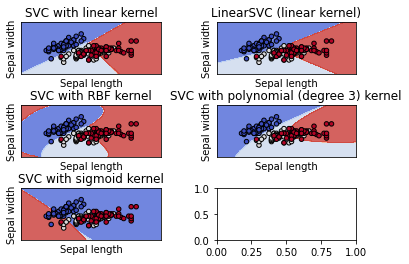

In [12]:
#source : https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C),
          svm.SVC(kernel='sigmoid', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with sigmoid kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(3, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.6)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Perbedaan tiap kernel SVR

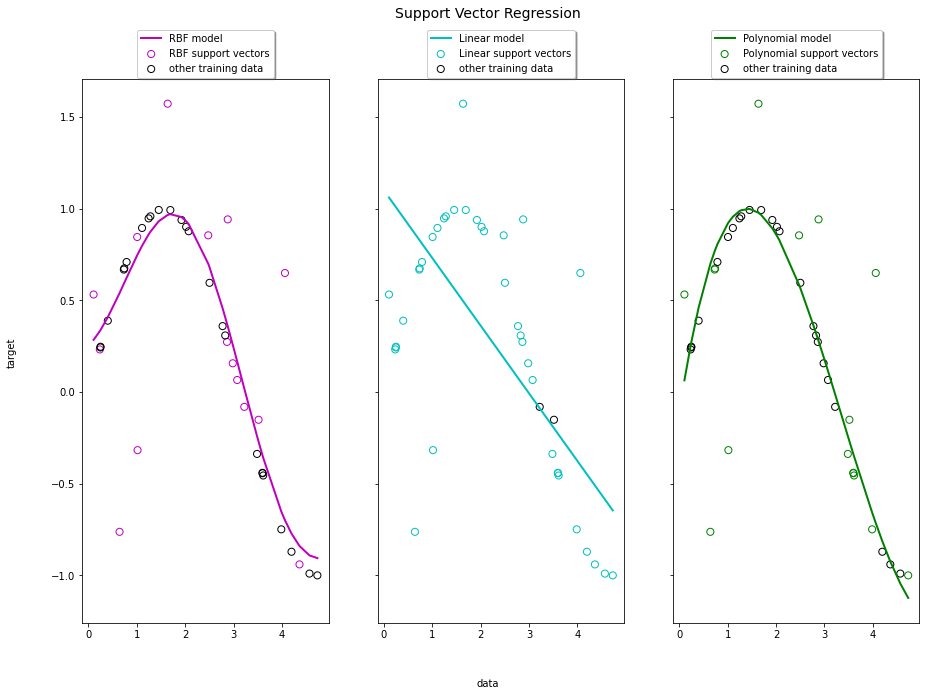

In [13]:
#source https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## Import Libraries and Data

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR

In [15]:
mobile_prices = pd.read_csv('mobile_prices.csv')

In [16]:
# Mencetak dimensi data
print("data: ", mobile_prices.shape)

data:  (2000, 21)


In [17]:
mobile_prices.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Penjelasan Dataset

Dataset yang digunakan adalah dataset Mobile Prices dimana kita memklasifikasi handphone lewat harganya, terdapat 21 atribut dan target atributnya adalah price_range

Penjelesan atribut:
* battery_power : Total energy a battery can store in one time measured in mAh
* blue : Has bluetooth or not
* clock_speed : speed at which microprocessor executes instructions
* dual_sim : Has dual sim support or not
* fc : Front Camera mega pixels
* four_g : Has 4G or not
* int_memory : Internal Memory in Gigabytes
* m_dep : Mobile Depth in cm
* mobile_wt : Weight of mobile phone
* n_cores : Number of cores of processor
* pc : Primary Camera mega pixels
* px_height : Pixel Resolution Height
* px_width : Pixel Resolution Width
* ram : Random Access Memory in Mega Bytes
* sc_h : Screen Height of mobile in cm
* sc_w : Screen Width of mobile in cm
* talk_time : Longest time that a single battery charge will last when you are
* three_g : Has 3G or not
* touch_screen : Has touch screen or not
* wifi : Has wifi or not
* price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## SOAL 1

Lakukanlah preprocessing terhadap data terlebih dahulu. Untuk memudahkan, silakan ikut langkah-langkah di bawah ini:

### SOAL 1a

Lakukan penanganan terhadap missing value pada data (Jika ada). Sertakan juga alasan dalam pemilihan penanganan missing value tersebut.

In [18]:
# Count Null Values
mobile_prices.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Tidak dilakukan apa-apa karena dataset tidak memiliki missing values.

### SOAL 1b

Lakukan penanganan terhadap duplikasi pada data (Jika ada). Sertakan juga alasan dalam pemilihan penanganan duplikasi data tersebut.

In [19]:
# Implementasi code di sini
pd.value_counts(mobile_prices.duplicated())

False    2000
dtype: int64

Tidak dilakukan apa-apa karena dataset tidak memiliki duplicated data.

### SOAL 1c

Lakukan penanganan terhadap outlier pada data (Jika ada). Sertakan juga alasan dalam pemilihan penanganan outlier tersebut.

battery_power            0
blue                     0
clock_speed              0
dual_sim                 0
fc                       18
four_g                   0
int_memory               0
m_dep                    0
mobile_wt                0
n_cores                  0
pc                       0
px_height                2
px_width                 0
ram                      0
sc_h                     0
sc_w                     0
talk_time                0
three_g                  477
touch_screen             0
wifi                     0
price_range              0


<AxesSubplot:>

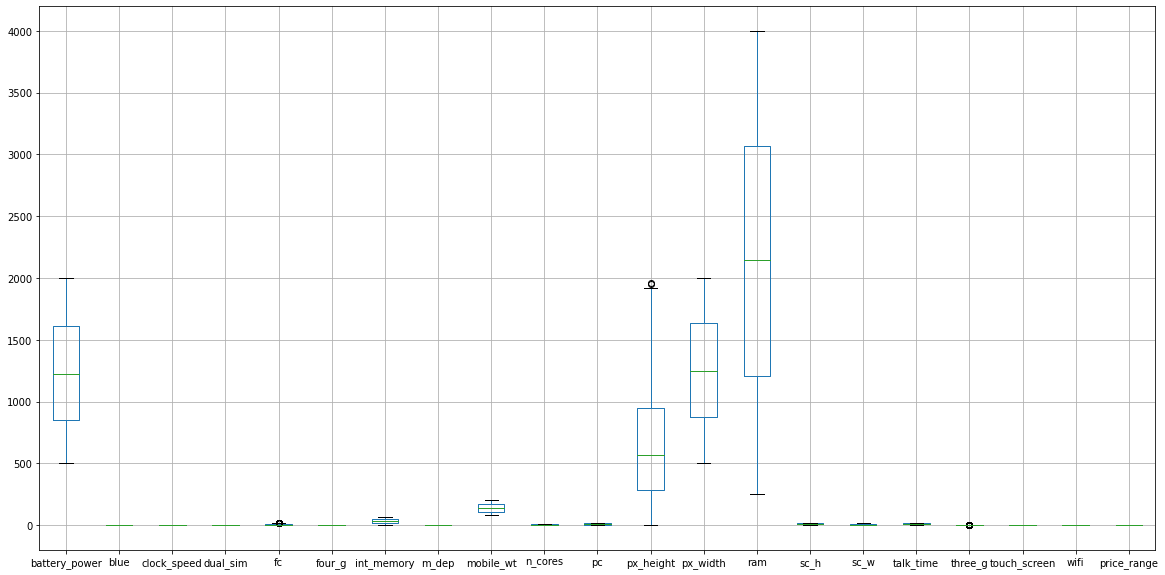

In [20]:
# Implementasi code di sini
def count_outlier(df, col):
    iqr = (df[col].quantile(0.75) - df[col].quantile(0.25))
    upper = df[col].quantile(0.75) + (iqr * 1.5)
    lower = df[col].quantile(0.25) - (iqr * 1.5)
    return ((df[col] < lower) | (df[col] > upper)).sum()

for i in mobile_prices.columns:
    print(f"{i:25s}{count_outlier(mobile_prices, i)}")

mobile_prices.boxplot(figsize=(20,10))

Tidak dilakukan apa-apa karena outlier masih dalam ambang batas yang wajar.

### SOAL 1d (Optional)

Silakan lakukan preprocessing data lainnya yang dibutuhkan

In [21]:
# Implementasi code di sini
X = mobile_prices.drop(['price_range'], axis=1)
y = mobile_prices['price_range']

X_normal = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=123)

## SOAL 2 (Linear SVC)

Implementasikan Linear SVC. Untuk soal ini gunakan library SVC dengan kernel linear dan LinearSVC kemudian bandingkan kedua library tersebut, sekalian lakukan hyperparameter tuning C untuk meningkatan akurasi model (Coba gunakan GridSearchCV).
* C merupakan parameter penalty, yang merepresentasikan
misklasifikasi atau error term. Misklasifikasi menjelaskan seberapa
besar error yang dapat ditoleransi untuk optimisasi SVM. Parameter ini
berkaitan dengan bagaimana kita mengontrol tradeoff antara
penetapan decision boundary (hyperplane) dengan error term. 

Tampilkan nilai akurasi, presisi, recall, dan F1-Score dari hasil prediksi yang didapat.

### SOAL 2a (SVC dengan kernel linear)

In [22]:
# Create a svm Classifier
svc = GridSearchCV(SVC(kernel='linear'), param_grid={'C' : [0.01, 0.1, 1.0, 10.0]})

# Train the model using the training sets
svc.fit(X_train, y_train)

# Print the param used
print(svc.best_params_)

# Predict the response for test dataset
y_pred = svc.predict(X_test)

{'C': 10.0}


In [23]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

# Model F1-Score
print("F1-Score:", metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9675
Precision: 0.9697771008741021
Recall: 0.9675553975589525
F1-Score: 0.9685566535487601


### SOAL 2b (LinearSVC)

In [24]:
# Create a svm Classifier
linSVC = GridSearchCV(LinearSVC(max_iter=20000), param_grid={'C' : [0.01, 0.1, 1.0, 10.0]}, n_jobs=4)

# Train the model using the training sets
linSVC.fit(X_train, y_train)

# Print the param used
print(linSVC.best_params_)

# Predict the response for test dataset
y_pred = linSVC.predict(X_test)

{'C': 10.0}


In [25]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

# Model F1-Score
print("F1-Score:", metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.8475
Precision: 0.8510787223876956
Recall: 0.8567042896077735
F1-Score: 0.8535390980654727


### SOAL 2c

Lakukan perbandingan terhadap hasil yang didapat pada soal nomor 2a dan 2b. Lakukan analisis terhadap kedua hasil tersebut dan tuliskan hasil analisis yang didapat.

Secara keseluruhan, hasil yang didapat menggunakan SVC dengan kernel linear lebih baik dibandingkan LinearSVC. Hal ini kemungkinan terjadi karena dalam multi-class classification, LinearSVC menggunakan metode One-vs-Rest, sedangkan SVC dengan kernel linear menggunakan metode One-vs-One. Metode One-vs-Rest melakukan klasifikasi dengan membandingkan satu class dengan sisa class lainnya. Sedangkan metode One-vs-One melakukan perbandingan satu class dengan satu class juga. Total jumlah perbandingan yang dilakukan dalam menentukan suatu elemen masuk ke class mana jauh lebih banyak dengan metode One-vs-One dibandingkan One-vs-Rest. Sehingga terlihat bahwa SVC lebih akurat dibandingkan LinearSVC, karena mempertimbangkan lebih banyak kemungkinan dalam melakukan klasifikasi.

## SOAL 3 (Non-Linear SVC)

Implementasikan Non-Linear SVC. Untuk soal ini gunakan library SVC dengan kernel poly, rbf, dan sigmoid kemudian bandingkan ketiga library tersebut, sekalian lakukan hyperparameter tuning C untuk meningkatan akurasi model (Coba gunakan GridSearchCV). 

Tampilkan nilai akurasi, presisi, recall, dan F1-Score dari hasil prediksi yang didapat.

### SOAL 3a (Poly)

In [26]:
# Create a svm Classifier
poly = GridSearchCV(SVC(kernel='poly'), param_grid={'C' : [0.01, 0.1, 1.0, 10.0]})

# Train the model using the training sets
poly.fit(X_train, y_train)

# Print the param used
print(poly.best_params_)

# Predict the response for test dataset
y_pred = poly.predict(X_test)

{'C': 1.0}


In [27]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

# Model F1-Score
print("F1-Score:", metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.785
Precision: 0.7918057078441981
Recall: 0.7865324683019316
F1-Score: 0.7888624170282544


### SOAL 3b (RBF)

In [28]:
# Create a svm Classifier
rbf = GridSearchCV(SVC(kernel='rbf'), param_grid={'C' : [0.01, 0.1, 1.0, 10.0]})

# Train the model using the training sets
rbf.fit(X_train, y_train)

# Print the param used
print(rbf.best_params_)

# Predict the response for test dataset
y_pred = rbf.predict(X_test)

{'C': 10.0}


In [29]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

# Model F1-Score
print("F1-Score:", metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.91
Precision: 0.9112856506238859
Recall: 0.9146708733262234
F1-Score: 0.9121458935144292


### SOAL 3c (Sigmoid)

In [30]:
# Create a svm Classifier
sgmd = GridSearchCV(SVC(kernel='sigmoid'), param_grid={'C' : [0.01, 0.1, 1.0, 10.0]})

# Train the model using the training sets
sgmd.fit(X_train, y_train)

# Print the param used
print(sgmd.best_params_)

# Predict the response for test dataset
y_pred = sgmd.predict(X_test)

{'C': 1.0}


In [31]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

# Model F1-Score
print("F1-Score:", metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.915
Precision: 0.9148989716423928
Recall: 0.9173343998104041
F1-Score: 0.9158656769986939


### SOAL 3d

Lakukan perbandingan terhadap hasil yang didapat pada soal nomor 3a, 3b dan 3c. Lakukan analisis terhadap ketiga hasil tersebut dan tuliskan hasil analisis yang didapat.

Dari 3 jenis model yang dibuat dengan kernel yang berbeda, didapat bahwa dengan menggunakan kernel Sigmoid dan nilai C=1 memberikan hasil terbaik. Dilanjuti oleh kernel RBF dan nilai C=10, dan terakhir kernel poly dan nilai C=1. Kernel sigmoid paling baik di sini karena perhitungannya yang menggunakan tangent. Perhitungan macam ini membuatnya mirip dengan linear. Karena dari soal-soal sebelumnya penggunaan kernel linear merupakan yang terbaik, tidak kaget juga jika sigmoid mendapatkan hasil yang terbaik di antara ketiga kernel non-linear.

## SOAL 4 (SVR)

Docs dari sklearn:


*   [LinearSVR - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html)
*   [SVR - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)



Explore sendiri tentang SVR dan jawab pertanyaan dibawah ini:


1. Apakah ada perbedaan LinearSVR dengan SVR(kernel = 'linear')? Jelaskan


Terdapat perbedaan penggunaan library di mana LinearSVR menggunakan liblinear, sedangkan <code>SVR(kernel = 'linear')</code> menggunakan libsvm. Menurut dokumentasinya, SVR fit complexity-nya melebihi kuadrat, sehingga untuk jumlah sampel yang besar cukup lama untuk dijalankan. Dari hal ini, kita dapat menggunakan LinearSVR saja untuk dataset yang sampelnya banyak.

2. Dari masing-masing kernel SVR, jelaskan kapan data cocok dengan kernel linear atau polynomial?

Lebih baik digunakan kernel linear di saat diketahui bahwa data kita membentuk suatu garis linear. Sedangkan jika berlaku sebaliknya, maka lebih baik digunakan kernel polynomial atau rbf. Jika digunakan kernel yang kurang sesuai maka hasil regresinya dapat menyimpang cukup jauh.

3. Jelaskan pengaruh parameter epsilon dan C dalam SVR?

Nilai epsilon pada SVR adalah semacam offset suatu titik dengan hasil regresi yang dibentuk. Semakin besar epsilon, maka titik-titik yang ada di dekat garis regresi akan ikut dihitung. Untuk nilai C, digunakan sebagai parameter untuk menyatakan seberapa besar error yang dapat diterima, kurang lebih mirip dengan parameter C pada SVC.